<a href="https://colab.research.google.com/github/arvind-maurya/IIML_Group_Project/blob/main/Predicting_Flight_Delay_MultiDimension_Feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#import the flight dataset
import pandas as pd #the pandas library is useful for data processing


#Read CSV file from drive. Drive is used because size of the dataset is large
#You need to mound the drive before running this code. Everytime you need to mount the drive before running the code.
df = pd.read_csv('/content/drive/MyDrive/flight_dataset/flights.csv', low_memory=False)

#df.shape give the dimension of dataset (rows x column)
print('Dataframe dimensions:',df.shape)

Dataframe dimensions: (5819079, 31)


In [3]:
flights_df = df.copy()

In [4]:
#Lets look at the top rows in dataset
pd.set_option('display.max_columns', None)
flights_df.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
column_to_remove = ['AIR_SYSTEM_DELAY',
                       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                       'WEATHER_DELAY', 'CANCELLATION_REASON',
                       'FLIGHT_NUMBER', 'TAIL_NUMBER']
flights_df.drop(column_to_remove, axis = 1, inplace = True)


In [6]:
flights_df.head(2)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0


Dataset flights.csv file description
1. More than 5'810'000 flights have been recorded in 2015.
2. These flights are described according to 31 variables.
3. A description of these variables can be found below

**YEAR, MONTH, DAY, DAY_OF_WEEK**: dates of the flight

**AIRLINE**: An identification number assigned by US DOT to identify a unique airline

**ORIGIN_AIRPORT** and **DESTINATION_AIRPORT**: code attributed by IATA to identify the airports

**SCHEDULED_DEPARTURE** and **SCHEDULED_ARRIVAL** : scheduled times of take-off and landing

**DEPARTURE_TIME** and **ARRIVAL_TIME**: real times at which take-off and landing took place

**DEPARTURE_DELAY** and **ARRIVAL_DELAY**: difference (in minutes) between planned and real times

**DISTANCE**: distance (in miles)

An additional file of this dataset, the airports.csv file, gives a more exhaustive description of the airports:

In [7]:
print('Dataframe dimensions Before Droppping Null:',flights_df.shape)
flights_df=flights_df.dropna()
print('Dataframe dimensions After Dropping Null:',flights_df.shape)

Dataframe dimensions Before Droppping Null: (5819079, 23)
Dataframe dimensions After Dropping Null: (5714008, 23)


In [8]:
import numpy as np
def transform_numeric(column_name):
  column= np.unique(flights_df[column_name])
  # print(column_name, ' attribute unique value:',column)

  from sklearn.preprocessing import LabelEncoder
  gle = LabelEncoder()
  #transform airline column into numerical column
  column_tf = gle.fit_transform(flights_df[column_name])
  column_mappings = {index: label for index, label in
                    enumerate(gle.classes_)}
  # print(column_name,' Mapping value:',column_mappings)
  return column_tf


In [9]:
flights_df['AIRLINE_TF'] = transform_numeric('AIRLINE')
flights_df['ORIGIN_AIRPORT_TF'] = transform_numeric('ORIGIN_AIRPORT')
flights_df['DESTINATION_AIRPORT_TF'] = transform_numeric('DESTINATION_AIRPORT')


1. If you look the SCHEDULED_DEPARTURE, 	DEPARTURE_TIME and	DEPARTURE_DELAY they are correlated.
2. DEPARTURE_DELAY is calculated based on DEPARTURE_TIME minus SCHEDULED_DEPARTURE
3. Nagative value of DEPARTURE_DELAY means the flight is departed early.

In [10]:
# flights_df['DEPARTURE_TIME_TF']=transform_numeric('DEPARTURE_TIME')

In [11]:
# flights_df['SCHEDULED_DEPARTURE_TF']=transform_numeric('SCHEDULED_DEPARTURE')

From the data, i will delete the column which is not relevance for predicting the flight delay re-arranging the columns for better interpretation

In [12]:
column_to_remove = ['AIRLINE',	'ORIGIN_AIRPORT',	'DESTINATION_AIRPORT']
flights_df.drop(column_to_remove, axis = 1, inplace = True)

In [13]:

# shift column 'DEPARTURE_DELAY' to second position
DD_column = flights_df.pop('DEPARTURE_DELAY')

# insert column into the dataframe using insert(position,column_name,
# column_contents) function
flights_df.insert(0, 'DEPARTURE_DELAY', DD_column) #Insert as second column, so position is 1

print("After shifting DD column to first position")
flights_df.head(2)

After shifting DD column to first position


,DEPARTURE_DELAY,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIRLINE_TF,ORIGIN_AIRPORT_TF,DESTINATION_AIRPORT_TF
0,-11.0,2015,1,1,4,5,2354.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,1,323,584
1,-8.0,2015,1,1,4,10,2.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,0,482,542


In [14]:
# Replace negative values with 0
flights_df[flights_df['DEPARTURE_DELAY'] < 0] = 0

Now, we willl study the behaviour of other column on the departure delay column.

Now this problem is a linear regression in multi dimension

In [15]:
#Given the large size of the dataset, I decide to consider only a subset of the data in order to reduce the computational time.
#I will just keep the flights from January 2015:
flights_df = flights_df[flights_df['MONTH'] == 1]
# flights_df1 = flights_df[flights_df['MONTH'] == 2]

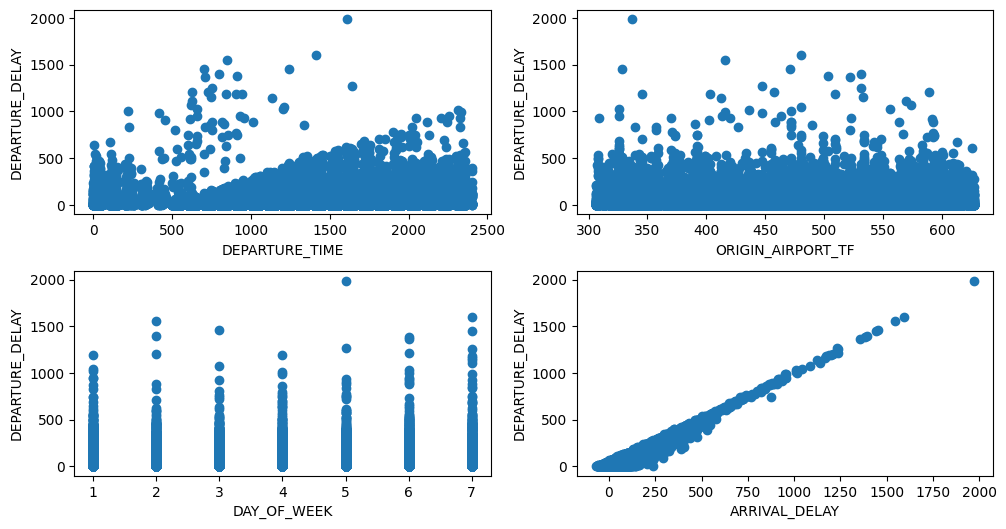

In [16]:
import matplotlib.pyplot as plt #the matplotlib library is useful for plotting purposes

# The following python directive helps to plot the graph in the notebook directly
%matplotlib inline
#We will plot multiple scatter plots of TOC vs other attributes
fig = plt.figure(figsize=(10, 10))

fig.constrained_layout=True

ax11 = fig.add_subplot(421)
ax12 = fig.add_subplot(422)
ax21 = fig.add_subplot(423)
ax22 = fig.add_subplot(424)

# ax31 = fig.add_subplot(425)
# ax32 = fig.add_subplot(426)
# ax41 = fig.add_subplot(427)
# ax42 = fig.add_subplot(428)

# scatter_plot(ax11,'YEAR')

ax11.scatter(flights_df['DEPARTURE_TIME'],flights_df['DEPARTURE_DELAY'])
#ax11.set_title('TOC vs Flight Length')
ax11.set_xlabel('DEPARTURE_TIME')
ax11.set_ylabel('DEPARTURE_DELAY')

ax12.scatter(flights_df['ORIGIN_AIRPORT_TF'],flights_df['DEPARTURE_DELAY'])
ax12.set_xlabel('ORIGIN_AIRPORT_TF')
ax12.set_ylabel('DEPARTURE_DELAY')

ax21.scatter(flights_df['DAY_OF_WEEK'],flights_df['DEPARTURE_DELAY'])
ax21.set_xlabel('DAY_OF_WEEK')
ax21.set_ylabel('DEPARTURE_DELAY')

ax22.scatter(flights_df['ARRIVAL_DELAY'],flights_df['DEPARTURE_DELAY'])
ax22.set_xlabel('ARRIVAL_DELAY')
ax22.set_ylabel('DEPARTURE_DELAY')

# ax31.scatter(flights_df['SCHEDULED_TIME'],flights_df['DEPARTURE_DELAY'])
# ax31.set_xlabel('SCHEDULED_TIME')
# ax31.set_ylabel('DEPARTURE_DELAY')

# ax32.scatter(flights_df['TAXI_OUT'],flights_df['DEPARTURE_DELAY'])
# ax32.set_xlabel('TAXI_OUT')
# ax32.set_ylabel('DEPARTURE_DELAY')

# ax41.scatter(flights_df['DESTINATION_AIRPORT_TF'],flights_df['DEPARTURE_DELAY'])
# ax41.set_xlabel('DESTINATION_AIRPORT_TF')
# ax41.set_ylabel('DEPARTURE_DELAY')

# ax42.scatter(flights_df['AIR_TIME'],flights_df['DEPARTURE_DELAY'])
# ax42.set_xlabel('AIR_TIME')
# ax42.set_ylabel('DEPARTURE_DELAY')



plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


In [17]:
#Let us now compute beta
n = len(flights_df.index) #number of data points in the data set
print('number of data points in the data set:',n)

number of data points in the data set: 200144


In [18]:

#extract the predictor variable columns
X_data = flights_df.iloc[:, 1:]

Text(0.5, 1.0, 'Correlation Matrix')

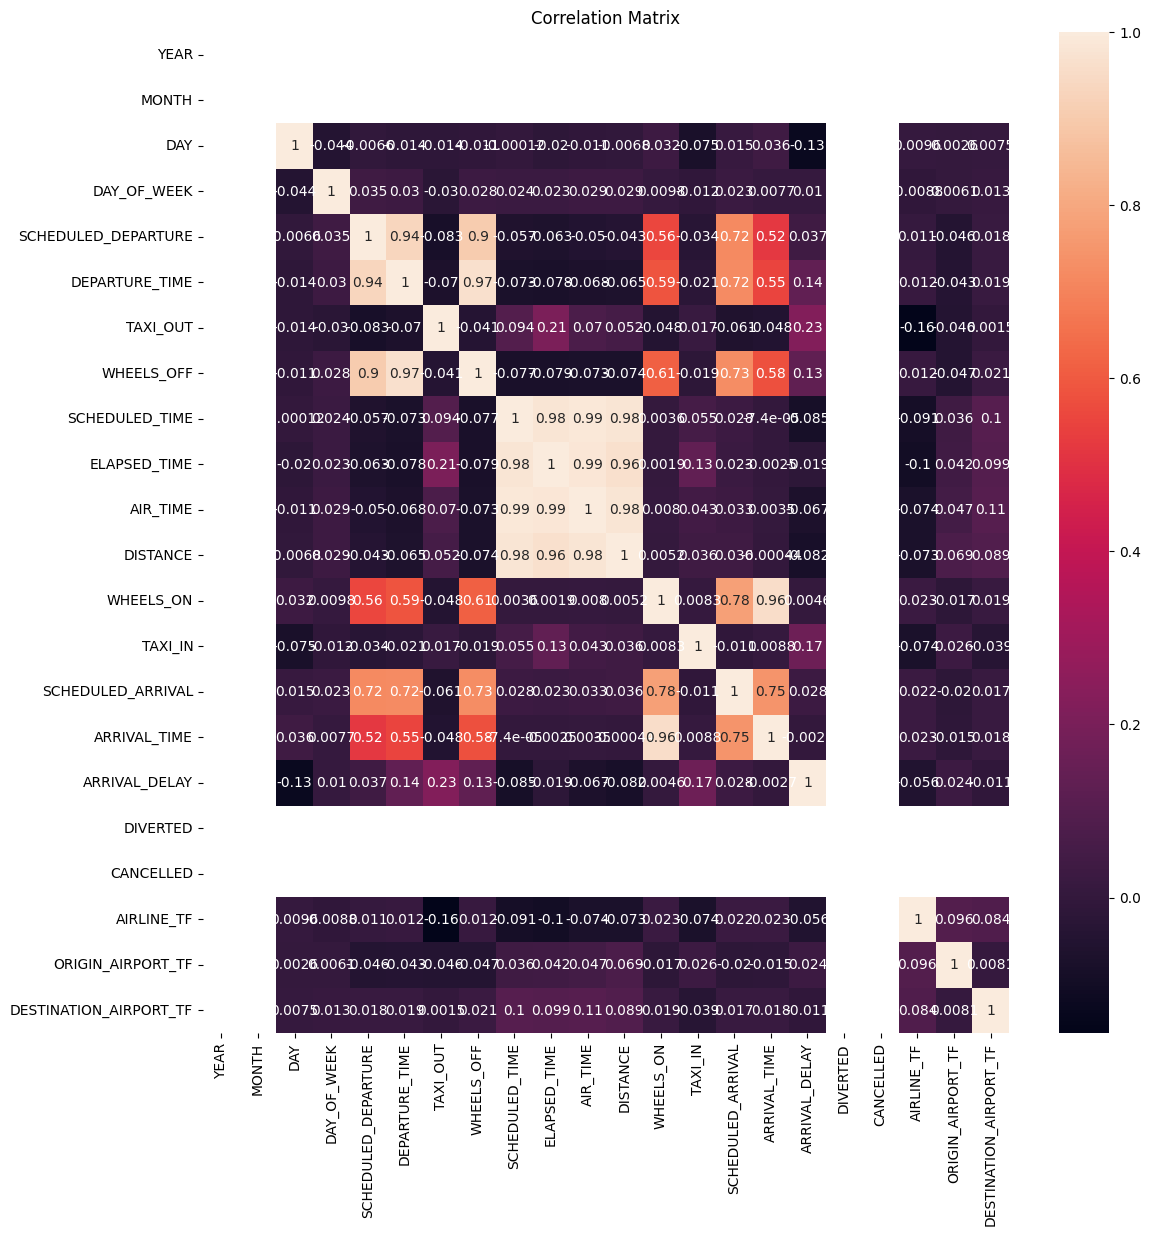

In [19]:
import seaborn as sns
X_data.corr()
plt.rcParams["figure.figsize"] = (13,13) # Custom figure size in inches
sns.heatmap(X_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [25]:
column1_to_remove = ['WHEELS_ON','AIR_TIME','ELAPSED_TIME','ARRIVAL_TIME','WHEELS_OFF','DISTANCE' ,'SCHEDULED_DEPARTURE']
X_data.drop(column1_to_remove, axis = 1, inplace = True)

In [26]:

#convert predictor variable columns into a numpy array

X_array = X_data.values

In [27]:

import numpy as np
#add a column of ones to X_array
X = np.hstack((X_array, np.ones((X_array.shape[0], 1), dtype=X_array.dtype)))


In [28]:

#convert predictor variable columns into a numpy array

response_cols = [0]
y = flights_df[flights_df.columns[response_cols]].to_numpy()


In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Get the coefficients (slopes) and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

score2=r2_score(y_test,y_pred)
print('R^2 score is:',score2)

Coefficients: [[ 0.00000000e+00 -5.59990422e-16  7.82479548e-02 -1.56752075e-01
   8.29598899e-04 -8.09327267e-01  5.13658919e-02 -8.23237538e-01
  -9.90825800e-04  9.62862405e-01 -2.22044605e-16  0.00000000e+00
  -1.82275457e-01 -7.60444406e-03 -1.63714336e-03  0.00000000e+00]]
Intercept: [22.71248931]
Mean Squared Error (MSE): 96.71563758034291
R^2 score is: 0.9611157138554463
